### **Auxiliar na Construção de uma Dieta Nutricional**

Geração 1 - Melhor Aptidão: 64.83932584269662
melhores individuos da geração 1: 
1 º -  [42, 13, 25, 15, 34, 33, 19, 10, 36, 6, 8, 18, 15, 28, 18, 19, 7, 31, 55, 25, 13, 40, 9, 8, 30, 38, 7, 36, 41, 40, 15, 3, 32, 4, 10, 11, 21, 25, 45, 41, 32, 33, 13, 10, 26, 5, 13, 22, 40, 25, 36, 41, 6, 34, 36, 22, 16, 14, 10, 3, 1, 33, 10]

Geração 2 - Melhor Aptidão: 64.83932584269662
melhores individuos da geração 2: 
1 º -  [42, 13, 25, 15, 34, 33, 19, 10, 36, 6, 8, 18, 15, 28, 18, 19, 7, 31, 55, 25, 13, 40, 9, 8, 30, 38, 7, 36, 41, 40, 15, 3, 32, 4, 10, 11, 21, 25, 45, 41, 32, 33, 13, 10, 26, 5, 13, 22, 40, 25, 36, 41, 6, 34, 36, 22, 16, 14, 10, 3, 1, 33, 10]

Geração 3 - Melhor Aptidão: 65.71966292134832
melhores individuos da geração 3: 
1 º -  [42, 13, 25, 15, 34, 33, 19, 10, 36, 6, 8, 18, 15, 28, 18, 19, 7, 31, 55, 25, 13, 40, 9, 8, 30, 38, 7, 36, 41, 40, 15, 3, 32, 4, 10, 11, 21, 25, 45, 41, 8, 28, 40, 17, 0, 23, 53, 12, 40, 35, 37, 4, 25, 0, 44, 40, 22, 40, 18, 25, 39, 17, 34]

Geração 4 

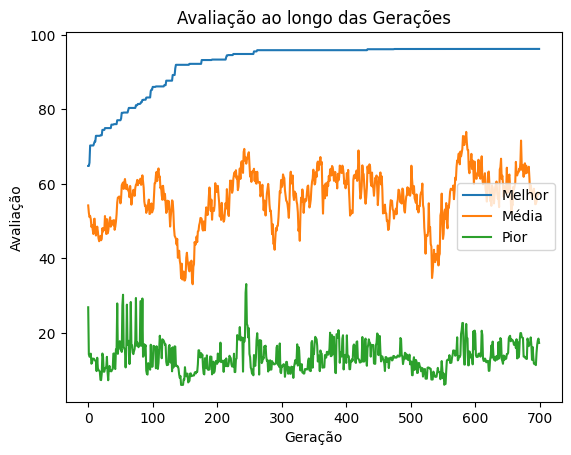

,Segunda-Feira,Terça-Feira,Quarta-Feira,Quinta-Feira,Sexta-Feira,Sábado,Domingo
CAFÉ DA MANHÃ,Pão de Mel (principal)Iogurte com Granola (acompanhamento)Muffin de Mirtilo (acompanhamento),Mingau de Milho (principal)Iogurte Grego (acompanhamento)Muffin de Mirtilo (acompanhamento),Tapioca com Queijo (principal)Muffin de Mirtilo (acompanhamento)Biscoitos (acompanhamento),Omelete (principal)Muffin de Mirtilo (acompanhamento)Granola (acompanhamento),Waffle com Morango (principal)Creme de Amendoim (acompanhamento)Muffin de Mirtilo (acompanhamento),Pão de Mel (principal)Muffin de Mirtilo (acompanhamento)Creme de Amendoim (acompanhamento),Torrada com Abacate (principal)Muffin de Mirtilo (acompanhamento)Suco de Laranja (acompanhamento)
ALMOÇO,Macarrão de Milho (principal)Quinoa (acompanhamento)Couve (acompanhamento),Macarrão de Trigo Sarraceno (principal)Arroz Integral (acompanhamento)Arroz Basmati (acompanhamento),Macarrão de Trigo Sarraceno (principal)Salada de Lentilhas (acompanhamento)Grão-de-bico (acompanhamento),Macarrão de Milho (principal)Arroz Selvagem (acompanhamento)Arroz (acompanhamento),Macarrão de Trigo Sarraceno (principal)Grão-de-Bico (acompanhamento)Salada de Alface e Rúcula (acompanhamento),Macarrão de Feijão Preto (principal)Arroz Selvagem (acompanhamento)Grão-de-Bico (acompanhamento),Macarrão de Milho (principal)Lentilhas (acompanhamento)Grão-de-bico (acompanhamento)
JANTAR,Macarrão de Milho (principal)Quinoa (acompanhamento)Salada de Cenoura Ralada (acompanhamento),Macarrão de Milho (principal)Salada de Beterraba (acompanhamento)Salada de Cenoura Ralada (acompanhamento),Carne de Boi (principal)Queijo (acompanhamento)Arroz Integral (acompanhamento),Macarrão de Feijão Preto (principal)Salada de Cenoura Ralada (acompanhamento)Lentilhas (acompanhamento),Macarrão de Milho (principal)Arroz (acompanhamento)Salada de Tomate e Alface (acompanhamento),Macarrão de Feijão Preto (principal)Arroz Integral (acompanhamento)Queijo (acompanhamento),Macarrão de Feijão Preto (principal)Couve (acompanhamento)Grão-de-Bico (acompanhamento)


In [ ]:
#from typing import Generator
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
from IPython.display import display, HTML

#Classe da avaliação responsavel por armazenar o individuo e sua nota
class Avaliacao:
    def __init__(self, individuo, nota):
        self.individuo = individuo.copy()
        self.nota = nota

tamanho_populacao = 100
tamanho_cromossomo = 63
taxa_mutacao = 0.01
num_geracoes = 700
qtd_elitismo = 1

limitacoes = {
    "proteinas": 500,
    "calorias": 14000,
    "carboidratos": 2800,
    "gorduras": 500
}

alimentos_geral = [
    {"nome": "Arroz", "calorias": 130, "proteinas": 2.7, "carboidratos": 28, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Frango", "calorias": 165, "proteinas": 31, "carboidratos": 0, "gorduras": 3.6, "categorias":["principal"]},
    {"nome": "Ovos", "calorias": 68, "proteinas": 5.5, "carboidratos": 0.6, "gorduras": 4.8, "categorias":["principal"]},
    {"nome": "Feijão", "calorias": 110, "proteinas": 6, "carboidratos": 20, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Batata", "calorias": 77, "proteinas": 2, "carboidratos": 17, "gorduras": 0.1, "categorias":["principal"]},
    {"nome": "Salmão", "calorias": 206, "proteinas": 22, "carboidratos": 0, "gorduras": 13, "categorias":["principal"]},
    {"nome": "Brócolis", "calorias": 55, "proteinas": 3.7, "carboidratos": 11.2, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Espinafre", "calorias": 23, "proteinas": 2.9, "carboidratos": 3.6, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Cenoura", "calorias": 41, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Lentilhas", "calorias": 116, "proteinas": 9, "carboidratos": 20, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Queijo", "calorias": 402, "proteinas": 25, "carboidratos": 2.3, "gorduras": 33, "categorias":["acompanhamento"]},
    {"nome": "Tomate", "calorias": 18, "proteinas": 0.9, "carboidratos": 4, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Camarão", "calorias": 85, "proteinas": 18, "carboidratos": 1, "gorduras": 1.7, "categorias":["principal"]},
    {"nome": "Macarrão", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Carne de Boi", "calorias": 250, "proteinas": 26, "carboidratos": 0, "gorduras": 17, "categorias":["principal"]},
    {"nome": "Carne de Porco", "calorias": 242, "proteinas": 25, "carboidratos": 0, "gorduras": 16, "categorias":["principal"]},
    {"nome": "Alface", "calorias": 5, "proteinas": 0.5, "carboidratos": 1, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Couve", "calorias": 49, "proteinas": 4.9, "carboidratos": 8.4, "gorduras": 0.8, "categorias":["acompanhamento"]},
    {"nome": "Arroz Integral", "calorias": 111, "proteinas": 2.6, "carboidratos": 23.5, "gorduras": 0.9, "categorias":["acompanhamento"]},
    {"nome": "Macarrão de Trigo Integral", "calorias": 180, "proteinas": 7.5, "carboidratos": 37.5, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Carne de Frango Grelhada", "calorias": 165, "proteinas": 31, "carboidratos": 0, "gorduras": 3.6, "categorias":["principal"]},
    {"nome": "Carne de Peito de Peru", "calorias": 135, "proteinas": 30, "carboidratos": 0, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Atum em Lata", "calorias": 116, "proteinas": 26, "carboidratos": 0, "gorduras": 0.6, "categorias":["principal"]},
    {"nome": "Salada de Tomate e Alface", "calorias": 30, "proteinas": 1.5, "carboidratos": 5, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Salada de Alface e Rúcula", "calorias": 20, "proteinas": 1.5, "carboidratos": 3, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Quinoa", "calorias": 120, "proteinas": 4.1, "carboidratos": 21, "gorduras": 1.9, "categorias":["acompanhamento"]},
    {"nome": "Arroz Integral", "calorias": 111, "proteinas": 2.6, "carboidratos": 23.5, "gorduras": 0.9, "categorias":["acompanhamento"]},
    {"nome": "Grão-de-bico", "calorias": 164, "proteinas": 8.9, "carboidratos": 27.4, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Salada de Lentilhas", "calorias": 143, "proteinas": 9.1, "carboidratos": 24.2, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Espaguete", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Massa Penne", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Salada de Beterraba", "calorias": 43, "proteinas": 1.6, "carboidratos": 9.6, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Salada de Cenoura Ralada", "calorias": 41, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Salada de Pepino", "calorias": 16, "proteinas": 0.6, "carboidratos": 3.6, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Salada de Abobrinha", "calorias": 20, "proteinas": 1.1, "carboidratos": 4.8, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Feijão Preto", "calorias": 132, "proteinas": 7.5, "carboidratos": 23.6, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Grão-de-Bico", "calorias": 164, "proteinas": 8.9, "carboidratos": 27.4, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Arroz Basmati", "calorias": 150, "proteinas": 3.5, "carboidratos": 35, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Arroz Selvagem", "calorias": 166, "proteinas": 6.5, "carboidratos": 36, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Macarrão de Trigo Sarraceno", "calorias": 344, "proteinas": 12, "carboidratos": 70, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Milho", "calorias": 357, "proteinas": 6, "carboidratos": 81, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Arroz", "calorias": 192, "proteinas": 3, "carboidratos": 43, "gorduras": 0.5, "categorias":["principal"]},
    {"nome": "Macarrão de Feijão Preto", "calorias": 358, "proteinas": 21, "carboidratos": 62, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Abobrinha", "calorias": 17, "proteinas": 1.2, "carboidratos": 3.6, "gorduras": 0.2, "categorias":["principal"]}]

alimentos_cafe = [
    {"nome": "Pão de Centeio", "calorias": 83, "proteinas": 2.7, "carboidratos": 17.2, "gorduras": 0.9, "categorias":["principal"]},
    {"nome": "Pão de Forma", "calorias": 265, "proteinas": 10, "carboidratos": 51, "gorduras": 2.4, "categorias":["principal"]},
    {"nome": "Leite de Soja", "calorias": 54, "proteinas": 3.3, "carboidratos": 1.5, "gorduras": 4.2, "categorias":["acompanhamento"]},
    {"nome": "Iogurte com Granola", "calorias": 180, "proteinas": 6, "carboidratos": 30, "gorduras": 3, "categorias":["acompanhamento"]},
    {"nome": "Cereal com Frutas", "calorias": 220, "proteinas": 4, "carboidratos": 50, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Pão de Queijo", "calorias": 160, "proteinas": 4, "carboidratos": 14, "gorduras": 10, "categorias":["principal"]},
    {"nome": "Bolo de Banana", "calorias": 240, "proteinas": 3, "carboidratos": 50, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Granola", "calorias": 231, "proteinas": 4.3, "carboidratos": 45, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Creme de Amendoim", "calorias": 190, "proteinas": 7, "carboidratos": 7, "gorduras": 16, "categorias":["acompanhamento"]},
    {"nome": "Panqueca de Aveia", "calorias": 124, "proteinas": 6, "carboidratos": 20, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Mingau de Aveia", "calorias": 143, "proteinas": 4, "carboidratos": 25, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Cereais Integrais", "calorias": 120, "proteinas": 4, "carboidratos": 24, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Mamão", "calorias": 59, "proteinas": 0.6, "carboidratos": 15, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Pêssego", "calorias": 39, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Iogurte Grego", "calorias": 100, "proteinas": 10, "carboidratos": 4, "gorduras": 6, "categorias":["acompanhamento"]},
    {"nome": "Café com Leite", "calorias": 60, "proteinas": 2.5, "carboidratos": 7, "gorduras": 2.5, "categorias":["acompanhamento"]},
    {"nome": "Suco de Laranja", "calorias": 120, "proteinas": 1, "carboidratos": 28, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Creme de Avelã", "calorias": 100, "proteinas": 1, "carboidratos": 8, "gorduras": 7, "categorias":["acompanhamento"]},
    {"nome": "Geleia de Morango", "calorias": 50, "proteinas": 0, "carboidratos": 13, "gorduras": 0, "categorias":["acompanhamento"]},
    {"nome": "Torrada Integral", "calorias": 80, "proteinas": 3, "carboidratos": 14, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Abacate na Torrada", "calorias": 200, "proteinas": 4, "carboidratos": 15, "gorduras": 15, "categorias":["principal"]},
    {"nome": "Waffle", "calorias": 218, "proteinas": 4, "carboidratos": 24, "gorduras": 12, "categorias":["principal"]},
    {"nome": "Geléia de Frutas", "calorias": 48, "proteinas": 0.3, "carboidratos": 12, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Tapioca", "calorias": 129, "proteinas": 0.2, "carboidratos": 31, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Iogurte de Morango", "calorias": 150, "proteinas": 5, "carboidratos": 27, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Geleia de Framboesa", "calorias": 52, "proteinas": 0, "carboidratos": 13, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Pão de Alho", "calorias": 200, "proteinas": 5, "carboidratos": 36, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Mingau de Milho", "calorias": 150, "proteinas": 3, "carboidratos": 35, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Batata Doce", "calorias": 90, "proteinas": 2, "carboidratos": 20, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Pão de Mel", "calorias": 380, "proteinas": 4, "carboidratos": 75, "gorduras": 7, "categorias":["principal"]},
    {"nome": "Pudim", "calorias": 110, "proteinas": 1, "carboidratos": 25, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Torrada com Abacate", "calorias": 150, "proteinas": 2, "carboidratos": 15, "gorduras": 9, "categorias":["principal"]},
    {"nome": "Salada de Frutas", "calorias": 120, "proteinas": 1, "carboidratos": 30, "gorduras": 0.5, "categorias":["principal"]},
    {"nome": "Pão com Nutella", "calorias": 200, "proteinas": 3, "carboidratos": 30, "gorduras": 8, "categorias":["principal"]},
    {"nome": "Crepes", "calorias": 110, "proteinas": 3, "carboidratos": 15, "gorduras": 4, "categorias":["principal"]},
    {"nome": "Torrada com Manteiga", "calorias": 120, "proteinas": 2, "carboidratos": 15, "gorduras": 6, "categorias":["principal"]},
    {"nome": "Pão de Frutas", "calorias": 200, "proteinas": 3, "carboidratos": 45, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Croissant", "calorias": 231, "proteinas": 5, "carboidratos": 24, "gorduras": 14, "categorias":["principal"]},
    {"nome": "Donuts", "calorias": 195, "proteinas": 2, "carboidratos": 22, "gorduras": 11, "categorias":["principal"]},
    {"nome": "Bagel", "calorias": 245, "proteinas": 10, "carboidratos": 50, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Muffin de Mirtilo", "calorias": 385, "proteinas": 5, "carboidratos": 61, "gorduras": 14, "categorias":["acompanhamento"]},
    {"nome": "Goiaba", "calorias": 68, "proteinas": 2.5, "carboidratos": 14, "gorduras": 0.7, "categorias":["acompanhamento"]},
    {"nome": "Salsicha", "calorias": 229, "proteinas": 6, "carboidratos": 1, "gorduras": 22, "categorias":["principal"]},
    {"nome": "Omelete", "calorias": 140, "proteinas": 13, "carboidratos": 1, "gorduras": 10, "categorias":["principal"]},
    {"nome": "Cuscuz", "calorias": 200, "proteinas": 5, "carboidratos": 45, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Molho de Tomate", "calorias": 82, "proteinas": 1, "carboidratos": 18, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Panqueca de Banana", "calorias": 110, "proteinas": 2, "carboidratos": 24, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Tapioca com Queijo", "calorias": 280, "proteinas": 6, "carboidratos": 35, "gorduras": 12, "categorias":["principal"]},
    {"nome": "Waffle com Morango", "calorias": 180, "proteinas": 5, "carboidratos": 40, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Pão de Batata", "calorias": 160, "proteinas": 3, "carboidratos": 30, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Tapioca com Nutella", "calorias": 320, "proteinas": 4, "carboidratos": 50, "gorduras": 11, "categorias":["principal"]},
    {"nome": "Cereais com Leite", "calorias": 200, "proteinas": 6, "carboidratos": 40, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Iogurte com Morango", "calorias": 150, "proteinas": 5, "carboidratos": 30, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Biscoitos", "calorias": 150, "proteinas": 2, "carboidratos": 25, "gorduras": 4, "categorias":["acompanhamento"]},
    {"nome": "Pão com Presunto", "calorias": 220, "proteinas": 9, "carboidratos": 45, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Bolinho de Chuva", "calorias": 260, "proteinas": 3, "carboidratos": 38, "gorduras": 11, "categorias":["principal"]}
]

def criar_cromossomo(tamanho_cromossomo):
    import random

    def adicionar_genes(categorias_alimentos, quantidade_acompanhamento):
        genes = []
        principal = random.choice(categorias_alimentos["principal"])
        genes.append(principal)
        acompanhamentos = random.sample(categorias_alimentos["acompanhamento"], quantidade_acompanhamento)
        genes.extend(acompanhamentos)
        return genes

    def separar_alimentos_por_categoria(alimentos):
        categorias = {"principal": [], "acompanhamento": []}
        for indice, alimento in enumerate(alimentos):
            for categoria in alimento["categorias"]:
                categorias[categoria].append(indice)
        return categorias

    categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe)
    categorias_geral = separar_alimentos_por_categoria(alimentos_geral)

    cromossomo_indices = []  # Lista para armazenar os índices dos alimentos no cromossomo

    # Adiciona genes alternando entre as listas de alimentos
    while len(cromossomo_indices) < tamanho_cromossomo:
        if len(cromossomo_indices) % 9 < 3:  # Primeiros 3 genes de cada 9 são de alimentos_cafe
            genes_indices = adicionar_genes(categorias_cafe, 2)
            cromossomo_indices.extend(genes_indices)
        else:  # Os próximos 6 genes são de alimentos_geral
            genes_indices = adicionar_genes(categorias_geral, 2)
            cromossomo_indices.extend(genes_indices)

    return cromossomo_indices

def avaliar_fitness_certa(cromossomo, alimentos_cafe, alimentos_geral, limites):
    total_proteinas = total_carboidratos = total_gorduras = total_calorias = 0

    # Faz com que a checagem use a lista correta
    for i, gene in enumerate(cromossomo):
        if (i % 9 < 3):
          alimentos = alimentos_cafe
        else:
          alimentos = alimentos_geral
        if gene < len(alimentos):
            alimento = alimentos[gene]

            total_proteinas += alimento["proteinas"]
            total_carboidratos += alimento["carboidratos"]
            total_gorduras += alimento["gorduras"]
            total_calorias += alimento["calorias"]

    valor_total = total_proteinas + total_carboidratos + total_gorduras + total_calorias
    penalidades = 0
    diferenca = 0

    if total_proteinas > limites["proteinas"]:
        diferenca += (total_proteinas - limites["proteinas"])
        penalidades += 1

    if total_carboidratos > limites["carboidratos"]:
        diferenca += (total_carboidratos - limites["carboidratos"])
        penalidades += 1

    if total_gorduras > limites["gorduras"]:
        diferenca += (total_gorduras - limites["gorduras"])
        penalidades += 1

    if total_calorias > limites["calorias"]:
        diferenca += (total_calorias - limites["calorias"])
        penalidades += 1

    #Aplica penalidade para duplicatas
    for i in range(1, len(cromossomo), 3):
      acomp1 = cromossomo[i]
      acomp2 = cromossomo[i + 1]
      if acomp1 == acomp2:
          diferenca += 1
          penalidades += 1

        # Se não houver penalidades, calcular o fitness normalmente
    if penalidades == 0:
        fitness = (valor_total / (limites["proteinas"] + limites["carboidratos"] + limites["gorduras"] + limites["calorias"]))*100
    else:
        # Caso contrário, penalizar o fitness
        fitness = (valor_total / ((limites["proteinas"] + limites["carboidratos"] + limites["gorduras"] + limites["calorias"] + diferenca) * (penalidades * 2)))*100

    return Avaliacao(cromossomo, fitness)

def selecionar_pais(populacao, avaliacoes):
    import random

    probabilidades = [avaliacao.nota / sum(avaliacao.nota for avaliacao in avaliacoes) for avaliacao in avaliacoes]
    # Seleciona pai1 com base nas probabilidades
    pai1_idx = random.choices(range(len(populacao)), weights=probabilidades)[0]
    pai1 = populacao[pai1_idx]

    # Seleciona pai2 com base nas probabilidades
    pai2_idx = random.choices(range(len(populacao)), weights=probabilidades)[0]
    pai2 = populacao[pai2_idx]

    return pai1, pai2

def cruzamento(pai1, pai2):
  # Faz o cruzamento entre os pais com ponto de corte único
    if random.random() < 0.80:
        ponto_de_corte = random.randint(0, len(pai1))
        filho1 = pai1[:ponto_de_corte] + pai2[ponto_de_corte:]
        filho2 = pai2[:ponto_de_corte] + pai1[ponto_de_corte:]
    else:
        filho1, filho2 = pai1, pai2

    return filho1, filho2

def mutacao(filho, taxa_mutacao):
    #Separa novamente os alimentos por categoria
    def separar_alimentos_por_categoria(alimentos):
        categorias = {"principal": [], "acompanhamento": []}
        for indice, alimento in enumerate(alimentos):
            for categoria in alimento["categorias"]:
                categorias[categoria].append(indice)
        return categorias

    categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe)
    categorias_geral = separar_alimentos_por_categoria(alimentos_geral)

    #Percorre o tamanho do filho, checando se há mutação, e se há mutação, qual lista deve ser usada e qual categoria deve ser adicionada
    for i in range(len(filho)):
        if random.random() < taxa_mutacao:
            if i % 9 == 0 or i % 9 == 3 or i % 9 == 6:  # Principais
                if i % 9 == 0:  # Alimentos do café
                    novo_gene = random.choice(categorias_cafe['principal'])
                else:  # Alimentos gerais
                    novo_gene = random.choice(categorias_geral['principal'])
            else:  # Acompanhamentos
                if i % 9 < 3:  # Alimentos do café
                    novo_gene = random.choice(categorias_cafe['acompanhamento'])
                else:  # Alimentos gerais
                    novo_gene = random.choice(categorias_geral['acompanhamento'])
            filho[i] = novo_gene

    return filho

#Seleciona os n melhores indivíduos com base em suas avaliações | Aonde n é o valor de qtd_elitismo
def elitismo(avaliacoes):
    return avaliacoes[:qtd_elitismo]

#Exibe tabela dieta cromossomo formatada
def print_cromossomo(cromossomo):
     dias_semana = ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']
     dt_cafe = []
     dt_almoco = []
     dt_jantar = []

     for i in range(0, len(cromossomo), 3):
        alimentoLinha = []
        for c in range(3):
            gene = cromossomo[i + c]
            if i % 9 < 3:
                alimento = alimentos_cafe[gene]
            else:
                alimento = alimentos_geral[gene]

            alimentoLinha.append(f"{alimento['nome']} ({', '.join(alimento['categorias'])})")

        refeicao = dt_cafe if i % 9 < 3 else (dt_almoco if i % 9 < 6 else dt_jantar)
        refeicao.append("\\n".join(alimentoLinha))

     dt_todos = {"CAFÉ DA MANHÃ" : dt_cafe, "ALMOÇO" : dt_almoco, "JANTAR" : dt_jantar}
     df_tabela = pd.DataFrame(dt_todos, index=dias_semana).T
     display(HTML("<h2>DIETA FINAL:</h2>" +  df_tabela.to_html().replace("\\n","<br>")))


melhores = []
piores = []
media = []
populacao = []

for _ in range(tamanho_populacao):
    cromossomo_indices = criar_cromossomo(tamanho_cromossomo)
    populacao.append(cromossomo_indices)

for geracao in range(num_geracoes):

    # Avaliação da aptidão da população
    avaliacoes = [(avaliar_fitness_certa(cromossomo, alimentos_cafe, alimentos_geral, limitacoes)) for cromossomo in populacao]
    avaliacoes.sort(key=lambda x: x.nota, reverse=True)

    melhores_individuos = elitismo(avaliacoes)
    pior_avaliacao = avaliacoes[-1]
    media_geracao = sum(avaliacao.nota for avaliacao in avaliacoes) / len(avaliacoes)

    melhores.append(melhores_individuos[0].nota)
    piores.append(pior_avaliacao.nota)
    media.append(media_geracao)

    # Imprime a melhor aptidão da geração atual
    print(f"Geração {geracao + 1} - Melhor Aptidão: {melhores_individuos[0].nota}")
    print(f"melhores individuos da geração {geracao + 1}: ")
    for i in range(qtd_elitismo):
      print(i+1, "º - ", melhores_individuos[i].individuo)
    print()

    # Substitui a população antiga pela nova
    nova_populacao = [melhor.individuo.copy() for melhor in melhores_individuos]
    while len(nova_populacao) < tamanho_populacao:  # Um espaço é reservado para o melhor cromossomo
        pai1, pai2 = selecionar_pais(populacao, avaliacoes)
        filho1, filho2 = cruzamento(pai1, pai2)
        filho1 = mutacao(filho1, taxa_mutacao)
        filho2 = mutacao(filho2, taxa_mutacao)
        nova_populacao.append(filho1)
        nova_populacao.append(filho2)

    # Atualiza a população atual com a nova população
    populacao = nova_populacao
    #print(populacao)

print()

geracoes = list(range(num_geracoes))
plt.plot(geracoes, melhores, label='Melhor')
plt.plot(geracoes, media, label='Média')
plt.plot(geracoes, piores, label='Pior')
plt.xlabel('Geração')
plt.ylabel('Avaliação')
plt.legend()
plt.title('Avaliação ao longo das Gerações')
plt.show()

print()

print_cromossomo(melhores_individuos[0].individuo)

### Normal, 0.01 mutação & 200 pop & 700 gerações & 1 elitismo

Geração 700 - Melhor Aptidão: 95.85786516853932 - [29, 40, 14, 39, 18, 23, 13, 37, 25, 38, 53, 40, 13, 38, 10, 40, 36, 32, 39, 40, 16, 14, 38, 34, 30, 36, 10, 54, 40, 7, 40, 38, 26, 13, 38, 36, 50, 8, 7, 13, 36, 35, 40, 36, 10, 47, 53, 3, 41, 38, 36, 19, 18, 3, 29, 41, 40, 13, 18, 10, 42, 10, 38]

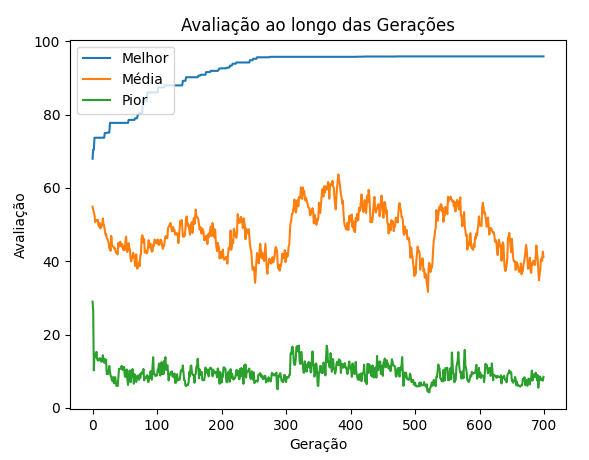

### 0.01 mutação & 200 pop & 700 gerações & 2 elitismo

Geração 700 - Melhor Aptidão: 96.24494382022472

1 º -  [48, 40, 14, 40, 23, 38, 13, 9, 10, 44, 40, 16, 13, 10, 38, 39, 17, 27, 4, 53, 40, 42, 37, 10, 19, 31, 35, 20, 22, 40, 42, 38, 25, 39, 38, 10, 4, 3, 25, 29, 37, 6, 40, 18, 38, 1, 40, 7, 39, 38, 0, 42, 3, 32, 50, 18, 40, 39, 27, 37, 40, 10, 35] Nota -  96.24494382022472

2 º -  [48, 40, 14, 40, 23, 38, 13, 9, 10, 44, 40, 16, 13, 10, 38, 39, 17, 27, 4, 53, 40, 42, 37, 10, 19, 31, 35, 20, 22, 40, 42, 38, 25, 39, 38, 10, 4, 3, 25, 29, 37, 6, 40, 18, 38, 1, 40, 7, 39, 38, 0, 42, 3, 32, 50, 18, 40, 39, 27, 37, 40, 10, 35] Nota -  96.24494382022472

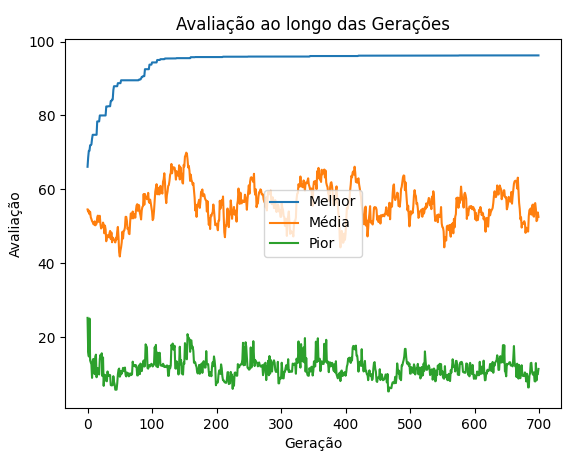